<a href="https://colab.research.google.com/github/AlvaroUriel/idal_ia3/blob/main/tfm_v0_2_301022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from  google.colab import drive
 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
test_img_path = '/content/drive/MyDrive/IA3/TFM/archive/images/BikesHelmets0.png'

In [4]:
test_dat_path = '/content/drive/MyDrive/IA3/TFM/archive/annotations/BikesHelmets0.xml'

In [5]:
from tensorflow import keras
import matplotlib.pyplot as plt; 
import matplotlib.patches as patches
from tensorflow.keras.utils import load_img

In [6]:
import xml.etree.ElementTree as ET

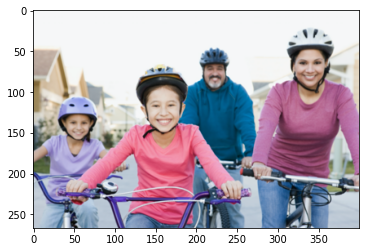

In [7]:
image = load_img(test_img_path)
plt.imshow(image) 

In [8]:
xml_file = open(test_dat_path)
print(xml_file.read())


<annotation>
    <folder>images</folder>
    <filename>BikesHelmets0.png</filename>
    <size>
        <width>400</width>
        <height>267</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>With Helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>29</xmin>
            <ymin>105</ymin>
            <xmax>82</xmax>
            <ymax>160</ymax>
        </bndbox>
    </object>
    <object>
        <name>With Helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>122</xmin>
            <ymin>66</ymin>
            <xmax>193</xmax>
            <ymax>154</ymax>
        </bndbox>
    </object>
    <object>
        <name>With Helmet</name>
        <pose>Unspecified</pose>
        <truncated>0</tr

In [9]:
tree=ET.parse(test_dat_path)
root=tree.getroot()
print(ET.tostring(root))

b'<annotation>\n    <folder>images</folder>\n    <filename>BikesHelmets0.png</filename>\n    <size>\n        <width>400</width>\n        <height>267</height>\n        <depth>3</depth>\n    </size>\n    <segmented>0</segmented>\n    <object>\n        <name>With Helmet</name>\n        <pose>Unspecified</pose>\n        <truncated>0</truncated>\n        <occluded>0</occluded>\n        <difficult>0</difficult>\n        <bndbox>\n            <xmin>29</xmin>\n            <ymin>105</ymin>\n            <xmax>82</xmax>\n            <ymax>160</ymax>\n        </bndbox>\n    </object>\n    <object>\n        <name>With Helmet</name>\n        <pose>Unspecified</pose>\n        <truncated>0</truncated>\n        <occluded>0</occluded>\n        <difficult>0</difficult>\n        <bndbox>\n            <xmin>122</xmin>\n            <ymin>66</ymin>\n            <xmax>193</xmax>\n            <ymax>154</ymax>\n        </bndbox>\n    </object>\n    <object>\n        <name>With Helmet</name>\n        <pose>Unspe

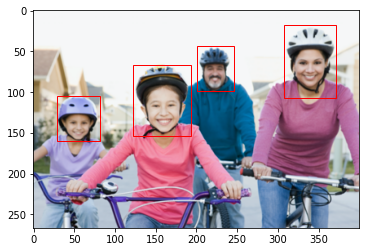

In [10]:
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

for element in tree.findall('object'):

    xmin = int(element.find("bndbox").find('xmin').text)
    ymin = int(element.find("bndbox").find('ymin').text)
    xmax = int(element.find("bndbox").find('xmax').text)
    ymax = int(element.find("bndbox").find('ymax').text)

    h = ymax - ymin
    w = xmax - xmin

    # Create a Rectangle patch
    rect = patches.Rectangle((int(xmin), int(ymin)), int(w), int(h), linewidth=1, edgecolor='r', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; 
import matplotlib.image as img
from numpy.core.fromnumeric import argmax

In [12]:
# Keras
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras.models import Sequential
from keras.applications import imagenet_utils
from tensorflow.keras.utils import load_img, img_to_array
from keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory



b'<annotation>\n    <folder>images</folder>\n    <filename>BikesHelmets0.png</filename>\n    <size>\n        <width>400</width>\n        <height>267</height>\n        <depth>3</depth>\n    </size>\n    <segmented>0</segmented>\n    <object>\n        <name>With Helmet</name>\n        <pose>Unspecified</pose>\n        <truncated>0</truncated>\n        <occluded>0</occluded>\n        <difficult>0</difficult>\n        <bndbox>\n            <xmin>29</xmin>\n            <ymin>105</ymin>\n            <xmax>82</xmax>\n            <ymax>160</ymax>\n        </bndbox>\n    </object>\n    <object>\n        <name>With Helmet</name>\n        <pose>Unspecified</pose>\n        <truncated>0</truncated>\n        <occluded>0</occluded>\n        <difficult>0</difficult>\n        <bndbox>\n            <xmin>122</xmin>\n            <ymin>66</ymin>\n            <xmax>193</xmax>\n            <ymax>154</ymax>\n        </bndbox>\n    </object>\n    <object>\n        <name>With Helmet</name>\n        <pose>Unspe

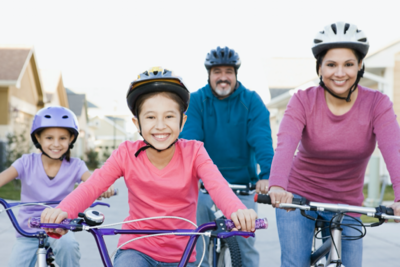

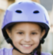

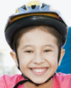

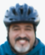

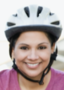

In [13]:
import cv2
from google.colab.patches import cv2_imshow
tree=ET.parse(test_dat_path)
root=tree.getroot()
print(ET.tostring(root))

# Create figure and axes
img = cv2.imread(test_img_path)
cv2_imshow(img)

for element in tree.findall('object'):

    xmin = int(element.find("bndbox").find('xmin').text)
    ymin = int(element.find("bndbox").find('ymin').text)
    xmax = int(element.find("bndbox").find('xmax').text)
    ymax = int(element.find("bndbox").find('ymax').text)

    h = ymax - ymin
    w = xmax - xmin

    # Cropping an image
    cropped_image = img[ymin:ymax, xmin:xmax, ]
    
    # Display cropped image
    cv2_imshow(cropped_image)

    plt.show()

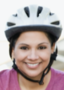

In [14]:
cv2_imshow(cropped_image)

In [15]:
bCropImages = 0
if(bCropImages):

  img_path      = '/content/drive/MyDrive/IA3/TFM/archive/images/'
  xml_path      = '/content/drive/MyDrive/IA3/TFM/archive/annotations/'
  img_crop_path = '/content/drive/MyDrive/IA3/TFM/archive/croppedImages/'
  cont=[0,0]
  cont_element = 0

  contenido = os.listdir(img_path)

  for fichero in contenido:
    if fichero.endswith('.png'):
      
      img = cv2.imread(img_path+fichero)
      tree=ET.parse(xml_path+fichero[:-3]+'xml')

      cont_element = 0

      for element in tree.findall('object'):

        clase = int(np.invert('Without' in element.find("name").text))
        xmin = int(element.find("bndbox").find('xmin').text)
        ymin = int(element.find("bndbox").find('ymin').text)
        xmax = int(element.find("bndbox").find('xmax').text)
        ymax = int(element.find("bndbox").find('ymax').text)

        h = ymax - ymin
        w = xmax - xmin

        # Cropping an image
        cropped_image = img[ymin:ymax, xmin:xmax]

        if cropped_image.shape[0]==0 and cropped_image.shape[1]==0:
          print(fichero + ' object: ' + str(cont_element) + ' is empty!')
        else:
          cv2.imwrite(img_crop_path + str(clase) + '_' + str(cont[clase]) + '.png', cropped_image)
          cont[clase] = cont[clase] + 1
          cont_element = cont_element +1



In [16]:
data_path = '/content/drive/MyDrive/IA3/TFM/archive/croppedImages/'

#Creamos listas con todos los nombres de los ficheros 
data_0=[]
data_1=[]

for img in os.listdir(data_path):
  if '0_' in img:
    data_0.append(os.path.join(data_path,img))
  else:
    data_1.append(os.path.join(data_path,img))

print(len(os.listdir(data_path)), len(data_0), len(data_1), len(data_0) + len(data_1))

1434 482 952 1434


In [17]:
from sklearn.model_selection import train_test_split

train_0, test_0 = train_test_split(data_0, test_size=0.4)
test_0, val_0 = train_test_split(test_0, test_size=0.5)

print(len(data_0), len(train_0), len(test_0), len(val_0))

train_1, test_1 = train_test_split(data_1, test_size=0.4)
test_1, val_1 = train_test_split(test_1, test_size=0.5)

print(len(data_1), len(train_1), len(test_1), len(val_1))

482 289 96 97
952 571 190 191


In [18]:
train_0[0:3]

['/content/drive/MyDrive/IA3/TFM/archive/croppedImages/0_110.png',
 '/content/drive/MyDrive/IA3/TFM/archive/croppedImages/0_451.png',
 '/content/drive/MyDrive/IA3/TFM/archive/croppedImages/0_383.png']

In [19]:
train_1[0:3]

['/content/drive/MyDrive/IA3/TFM/archive/croppedImages/1_233.png',
 '/content/drive/MyDrive/IA3/TFM/archive/croppedImages/1_334.png',
 '/content/drive/MyDrive/IA3/TFM/archive/croppedImages/1_137.png']

In [20]:
num_classes = 2
y = []

for img in train_0:
  y.append(0) 

y_train_0 = np_utils.to_categorical(y, num_classes)

In [21]:
y = []

for img in train_1:
  y.append(1) 

y_train_1 = np_utils.to_categorical(y, num_classes)

In [22]:
y = []

for img in test_0:
  y.append(0) 

y_test_0 = np_utils.to_categorical(y, num_classes)

In [23]:
y = []

for img in test_1:
  y.append(1) 

y_test_1 = np_utils.to_categorical(y, num_classes)

In [24]:
y = []

for img in val_0:
  y.append(0) 

y_val_0 = np_utils.to_categorical(y, num_classes)

In [25]:
y = []

for img in val_1:
  y.append(1) 

y_val_1 = np_utils.to_categorical(y, num_classes)

In [26]:
y_train = np.concatenate([y_train_0, y_train_1])
y_test = np.concatenate([y_test_0, y_test_1])
y_val = np.concatenate([y_val_0, y_val_1])
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(860, 2)
(286, 2)
(288, 2)


In [27]:
train = train_0 + train_1
test = test_0 + test_1
val = val_0 + val_1
print(len(train))
print(len(test))
print(len(val))


860
286
288


In [28]:
#Clase para mostrar imagenes
def show_imgs(X):
    plt.figure(figsize=(8, 8))
    #k = 0
    k= np.random.randint(0, len(X)-1-16)

    for i in range(0,4):
        for j in range(0,4):
            image = load_img(train[k], target_size=(224, 224))
            ax = plt.subplot2grid((4,4),(i,j))
            ax.set_title('Clase: ' + str(y_train[k]) )     
            plt.imshow(image)            
            k = k+1
    #Muestra
    plt.show()

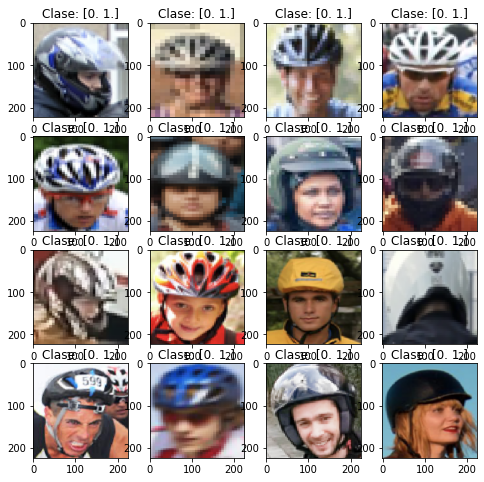

In [29]:
show_imgs(train)


In [30]:
def create_features(dataset):
 
    x_scratch = []

    k=0

    #Bucle sobre las imagenes
    for imagePath in dataset:
 
        #Se cargan las imagenes a tamaño 224
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)
 
        # preprocess the image by (1) expanding the dimensions and
        # (2) subtracting the mean RGB pixel intensity from the
        # ImageNet dataset
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)
 
        # add the image to the batch
        x_scratch.append(image)

        k = k+1
        print('convertida:', k, ' de ', len(dataset))
 
    x = np.vstack(x_scratch)
    return x

In [31]:
train_x = create_features(train)
val_x = create_features(val)
test_x = create_features(test)
print(train_x.shape)
print(val_x.shape)
print(test_x.shape)

convertida: 1  de  860
convertida: 2  de  860
convertida: 3  de  860
convertida: 4  de  860
convertida: 5  de  860
convertida: 6  de  860
convertida: 7  de  860
convertida: 8  de  860
convertida: 9  de  860
convertida: 10  de  860
convertida: 11  de  860
convertida: 12  de  860
convertida: 13  de  860
convertida: 14  de  860
convertida: 15  de  860
convertida: 16  de  860
convertida: 17  de  860
convertida: 18  de  860
convertida: 19  de  860
convertida: 20  de  860
convertida: 21  de  860
convertida: 22  de  860
convertida: 23  de  860
convertida: 24  de  860
convertida: 25  de  860
convertida: 26  de  860
convertida: 27  de  860
convertida: 28  de  860
convertida: 29  de  860
convertida: 30  de  860
convertida: 31  de  860
convertida: 32  de  860
convertida: 33  de  860
convertida: 34  de  860
convertida: 35  de  860
convertida: 36  de  860
convertida: 37  de  860
convertida: 38  de  860
convertida: 39  de  860
convertida: 40  de  860
convertida: 41  de  860
convertida: 42  de  860
c

In [32]:
# Creating a checkpointer
checkpointer = ModelCheckpoint(filepath='scratchmodel.best.hdf5',
                               verbose=1,save_best_only=True)
# load the VGG16 network
print("[INFO loading network...")
model_vgg = VGG16(weights="imagenet", include_top=False, input_shape=train_x.shape[1:])
model_vgg.summary()

[INFO loading network...
58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                     

In [33]:
model_transfer_full = Sequential()
model_transfer_full.add(model_vgg)
model_transfer_full.add(GlobalAveragePooling2D())
model_transfer_full.add(Dropout(0.2))
model_transfer_full.add(Dense(100, activation='relu'))
model_transfer_full.add(Dense(num_classes, activation='softmax'))
model_transfer_full.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 100)               51300     
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 14,766,190
Trainable params: 14,766,190
Non-trainable params: 0
____________________________________________

In [34]:
opt = Adam(learning_rate=0.00001)
model_transfer_full.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
history = model_transfer_full.fit(train_x, y_train, batch_size=32, epochs=10,
          validation_data=(val_x, y_val), callbacks=[checkpointer],verbose=1, shuffle=True)

Epoch 1/10
27/27 [==============================] - ETA: 0s - loss: 0.7310 - accuracy: 0.6593
Epoch 1: val_loss improved from inf to 0.53201, saving model to scratchmodel.best.hdf5
27/27 [==============================] - 34s 717ms/step - loss: 0.7310 - accuracy: 0.6593 - val_loss: 0.5320 - val_accuracy: 0.7188
Epoch 2/10
27/27 [==============================] - ETA: 0s - loss: 0.5043 - accuracy: 0.7605
Epoch 2: val_loss improved from 0.53201 to 0.45006, saving model to scratchmodel.best.hdf5
27/27 [==============================] - 14s 537ms/step - loss: 0.5043 - accuracy: 0.7605 - val_loss: 0.4501 - val_accuracy: 0.7882
Epoch 3/10
27/27 [==============================] - ETA: 0s - loss: 0.4052 - accuracy: 0.7895
Epoch 3: val_loss improved from 0.45006 to 0.39225, saving model to scratchmodel.best.hdf5
27/27 [==============================] - 15s 543ms/step - loss: 0.4052 - accuracy: 0.7895 - val_loss: 0.3923 - val_accuracy: 0.8403
Epoch 4/10
27/27 [==============================] - E

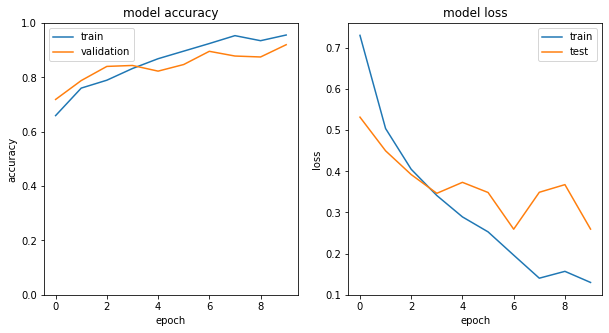

In [35]:
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))
 
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.ylim([0, 1])
 
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
 
plot_accuracy_loss(history)

In [36]:
test_y=[]

for i in y_test:
  test_y.append(np.argmax(i))

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
preds = np.argmax(model_transfer_full.predict(test_x), axis=1)
print("\nAccuracy on Test Data: ", accuracy_score(test_y, preds))
print("\nNumber of correctly identified imgaes: ",
      accuracy_score(test_y, preds, normalize=False),"\n")
confusion_matrix(test_y, preds, labels=range(0,num_classes))

9/9 [==============================] - 4s 503ms/step

Accuracy on Test Data:  0.916083916083916

Number of correctly identified imgaes:  262 



array([[ 82,  14],
       [ 10, 180]])

Ground truth:  0   Without helmet
1/1 [==============================] - 0s 15ms/step
Predict:       0   Without helmet


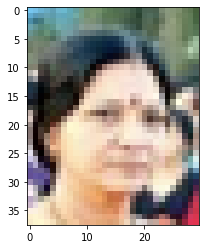

In [59]:
import matplotlib.image as img

classes_names = ('Without helmet','With helmet')

id=np.random.randint(0, len(val)-1)

image = img.imread(val[id])

plt.imshow(image[:,:,:], cmap='gray', vmin = 0, vmax = 255,interpolation='none')
print("Ground truth: ", y_val[id].argmax(), " ", classes_names[y_val[id].argmax()])
#plt.imshow(train_x[id])

p = model_transfer_full.predict(np.expand_dims(val_x[id], axis=0))
print("Predict:      ", p.argmax(), " ", classes_names[p.argmax()])